#### Universidad Autónoma de Aguascalientes
#### Departamento: Ciencias de la Computación
#### Carrera: Ingenieria en Computación Inteligente
#### Curso: Machine Learning y Deep Learning 
#### Maestro: Dr. Francisco Javier Luna Rosas

#### Alumno: Jorge Hernández
#### Semestre: Enero - Junio del 2025

In [11]:
# LIBRERIAS
import cv2
import math
import mediapipe as mp
import numpy as np
import pandas as pd
import os
import mediapipe as mp


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [12]:
Emociones = ["Alegria","Enojado","Tristeza","Sorprendido","Neutral"]
direccion = "../Examen_Analisis_de_Sentimientos_Face_Detection/Emociones"

In [13]:
def calcular_distancias(punto1, punto2):
    x1, y1, z1 = punto1.x, punto1.y, punto1.z
    x2, y2, z2 = punto2.x, punto2.y, punto2.z

    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distancia

In [14]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Crear un objeto de detección de rostros
face_mesh = mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True)

#### MODELO

In [61]:
data_emociones = pd.read_csv("data.csv")

In [6]:
x = data_emociones.iloc[:,1:7]
print(x[0:3])

   Distancia Entre Ceja y Ojo Izquierdo  Distancia Entre Ceja y Ojo Derecho  \
0                              0.038354                            0.036569   
1                              0.040557                            0.034360   
2                              0.039423                            0.037841   

   Apertura de Ojo Derecho  Apertura de Ojo Izquierdo  Ancho de Boca  \
0                 0.014894                   0.013454       0.121065   
1                 0.016143                   0.014084       0.117473   
2                 0.012520                   0.014501       0.119554   

   Apertura de Boca  
0          0.004098  
1          0.001385  
2          0.006010  


In [7]:
y = data_emociones.iloc[:,7:8]
print(y[0:3])

  Expresion
0   Alegria
1   Alegria
2   Alegria


In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, train_size=0.75, random_state=32)

In [51]:
MLP_Classifier = MLPClassifier(learning_rate_init=0.01, max_iter=800)
print(MLP_Classifier)

MLPClassifier(learning_rate_init=0.01, max_iter=800)


In [52]:
# accuracies = []

# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# k = 1
# skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# for train_index, test_index in skf.split(xTrain, yTrain.iloc[:, 0].values):
#     X_train_fold, X_test_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
#     y_train_fold, y_test_fold = yTrain.iloc[train_index, 0], yTrain.iloc[test_index, 0]

#     # Entrenar modelo en el fold actual
#     history = MLP_Classifier.fit(X_train_fold, y_train_fold)

#     # Evaluar el modelo en el fold actual
#     y_pred = MLP_Classifier.predict(X_test_fold)
#     acc = accuracy_score(y_test_fold, y_pred)
#     print(acc)
#     accuracies.append(acc)

# # Promedio de accuracy en todos los folds
# print(f"Accuracy promedio: {np.mean(accuracies):.4f}")

In [53]:
MLP_Classifier.fit(xTrain,yTrain.iloc[:,0].values)

MLPClassifier(learning_rate_init=0.01, max_iter=800)

In [54]:
print("Las predicciones en Testing son: \n")

valores_Predict = MLP_Classifier.predict(xTest)

print(f"Valor Real \t => Valor Predicho ")
print("=================================")

for i in range(10):
    print(f"{yTest.values[i]} \t\t => {valores_Predict[i]} ")

Las predicciones en Testing son: 

Valor Real 	 => Valor Predicho 
['Tristeza'] 		 => Tristeza 
['Alegria'] 		 => Alegria 
['Enojado'] 		 => Enojado 
['Enojado'] 		 => Enojado 
['Alegria'] 		 => Alegria 
['Enojado'] 		 => Enojado 
['Sorprendido'] 		 => Sorprendido 
['Tristeza'] 		 => Tristeza 
['Neutral'] 		 => Neutral 
['Alegria'] 		 => Alegria 


In [55]:
def indice_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal())/ np.sum(MC)
    error_global = 1 - precision_global
    precision_categorica = pd.DataFrame(MC.diagonal()/np.sum(MC,axis=1)).T
    if nombres != None:
        precision_categorica.columns = nombres
    return {"Matriz de Confusion:": MC,
            "Precisión Global": precision_global,
            "Error Global": error_global,
            "Precisión por Categoria": precision_categorica}

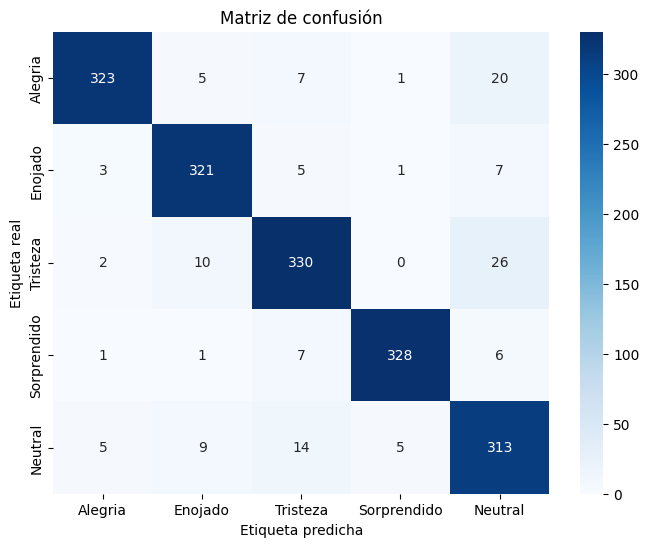

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

MC = confusion_matrix(yTest, valores_Predict)
plt.figure(figsize=(8, 6))
sns.heatmap(MC, annot=True, fmt='d', cmap='Blues',
            xticklabels=Emociones, yticklabels=Emociones)
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

In [57]:
MC = confusion_matrix(yTest, valores_Predict)
indices = indice_general(MC, list(np.unique(y)))

for k in indices:
    print("\n%s: \n%s"%(k,str(indices[k])))


Matriz de Confusion:: 
[[323   5   7   1  20]
 [  3 321   5   1   7]
 [  2  10 330   0  26]
 [  1   1   7 328   6]
 [  5   9  14   5 313]]

Precisión Global: 
0.9228571428571428

Error Global: 
0.07714285714285718

Precisión por Categoria: 
    Alegria   Enojado   Neutral  Sorprendido  Tristeza
0  0.907303  0.952522  0.896739     0.956268  0.904624


In [15]:
import joblib
#joblib.dump(MLP_Classifier, 'MLP_Classifier.pkl', compress=9)

In [ ]:
#MLP_Classifier = joblib.load('MLP_Classifier.pkl')

In [17]:
def predecir_rostro():

    cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
    faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    ref_x, ref_y, ref_w, ref_h = frame_width // 4, frame_height // 4, frame_width // 2, frame_height // 2

    while True:
        ret, frame = cap.read()

        if ret == False:
            print("❌ ERROR EN LA CAPTURA DE IMAGEN") 
            break

        results = face_mesh.process(frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        auxFrame = frame.copy()

        faces = faceClassif.detectMultiScale(gray,
            scaleFactor=1.1,
            minNeighbors=15,
            minSize=(30,30),
            maxSize=(500,500))
        
        cv2.rectangle(frame, (ref_x, ref_y), (ref_x + ref_w, ref_y + ref_h), (0, 0, 255), 2)  # Rojo si el rostro no está dentro

        for (x,y,w,h) in faces:
            
            faces = sorted(faces, key=lambda x: x[2] * x[3], reverse=True)
            x, y, w, h = faces[0]

            rectangule = cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)
            cara = auxFrame[y:y+h,x:x+w]
            cara = cv2.resize(cara,(150,150), interpolation=cv2.INTER_CUBIC)

            if x >= ref_x and y >= ref_y and (x + w) <= (ref_x + ref_w) and (y + h) <= (ref_y + ref_h):
                if results.multi_face_landmarks:
                    for face_landmarks in results.multi_face_landmarks:

                        # PUNTOS DE BOCA
                        # Punto medio labio superior
                        p13 = face_landmarks.landmark[13]
                        # Punto medio labio inferior
                        p14 = face_landmarks.landmark[14]

                        # Punto externo izquierdo
                        p61 = face_landmarks.landmark[61]
                        # Punto extremo derecho
                        p306 = face_landmarks.landmark[306]

                        # PUNTOS DE CEJA
                        # CEJA IZQUIERDA
                        p65 = face_landmarks.landmark[65]
                        # CEJA DERECHA
                        p295 = face_landmarks.landmark[295]

                        # PUNTOS DE OJO
                        # OJO IZQUIERDO
                        # PUNTO SUPERIOR
                        p159 = face_landmarks.landmark[159]
                        # PUNTO INFERIOR
                        p145 = face_landmarks.landmark[145]

                        # OJO DERECHO
                        # PUNTO SUPERIOR
                        p386 = face_landmarks.landmark[386]
                        # PUNTO INFERIOR
                        p374 = face_landmarks.landmark[374]
                        
                        Dist_Ojo_Izq = calcular_distancias(p65,p159)
                        Dist_Ojo_Der = calcular_distancias(p295,p386)

                        Aper_Ojo_Der = calcular_distancias(p386,p374)
                        Aper_Ojo_Izq = calcular_distancias(p159,p145)

                        Ancho_Boca = calcular_distancias(p61,p306)
                        Apertura_Boca = calcular_distancias(p13,p14)

                        values_prueba = [[Dist_Ojo_Izq,Dist_Ojo_Der,Aper_Ojo_Der,Aper_Ojo_Izq,Ancho_Boca,Apertura_Boca]]
                        values_prueba = pd.DataFrame(values_prueba, columns= ["Distancia Entre Ceja y Ojo Izquierdo","Distancia Entre Ceja y Ojo Derecho","Apertura de Ojo Derecho","Apertura de Ojo Izquierdo","Ancho de Boca","Apertura de Boca"])
                        
                        probabilidades = MLP_Classifier.predict_proba(values_prueba)
                        valores_Predict = MLP_Classifier.predict(values_prueba)

                        prob = str(round((np.max(probabilidades))*100,2))
                        cv2.putText(rectangule, valores_Predict[0], (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                        cv2.putText(rectangule, prob+"%", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            else:
                cv2.putText(frame, "Posiciona tu rostro en el cuadro", (ref_x, ref_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                    
        
        cv2.imshow("Capturando...", frame)
        
        if cv2.waitKey(1) & 0xFF == 27:  # Presiona 'Esc' para salir
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
predecir_rostro()